In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

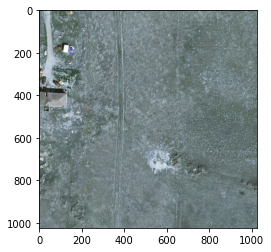

In [2]:
image_path = '../../data/raw/vehicules/Vehicules1024/00000006_co.png'
image = cv2.imread(image_path)
plt.imshow(image)

In [3]:
annotation_file = "../../data/raw/vehicules/Annotations1024/00000006.txt"
annotations = []

with open(annotation_file, 'r') as f:
        annotation_file = f.read()

for ann_row in annotation_file.split('\n'):
    # print(ann_row)
    # ann_row = ann_row.split(' ')
    if len(ann_row) > 0:
        ann_row = ann_row.split(' ')
        print(ann_row)
        
        rotation = ann_row[2]
        vehicle_class = ann_row[3]
        is_whole = ann_row[4]
        is_occluded = ann_row[5]
        
        x_center = float(ann_row[0])
        y_center = float(ann_row[1])
        
        x_1, y_1 = int(ann_row[6]), int(ann_row[6+4])
        x_2, y_2 = int(ann_row[7]), int(ann_row[7+4])
        x_3, y_3 = int(ann_row[8]), int(ann_row[8+4])
        x_4, y_4 = int(ann_row[9]), int(ann_row[9+4])
        
        
        

        annotations.append([[x_1, y_1],[x_2, y_2], [x_3, y_3], [x_4, y_4] ])
        
        boxes = np.array([[[x_1, y_1],[x_2, y_2], [x_3, y_3], [x_4, y_4] ]], np.int32)
        # cv2.polylines(image, [boxes], True, (0,255,0), thickness=3)

    # if vehicle_class == '2' and is_whole == '1' and is_occluded == '0':
        

['20.342700', '732.218553', '2.663762', '1', '1', '0', '31', '38', '10', '3', '720', '730', '745', '734']
['10.840562', '295.124714', '1.951303', '1', '1', '0', '10', '22', '9', '1', '278', '285', '312', '306']
['24.534819', '332.760633', '1.762844', '1', '1', '0', '22', '34', '30', '12', '314', '316', '353', '349']
['88.441355', '349.808586', '0.668289', '1', '1', '0', '78', '106', '99', '70', '334', '356', '366', '343']
['91.886124', '178.636005', '3.013269', '1', '1', '5', '76', '106', '109', '77', '174', '170', '183', '187']
['127.099929', '181.803384', '-1.346085', '5', '1', '0', '121', '141', '135', '111', '163', '166', '201', '198']
['152.811596', '187.392877', '1.354711', '1', '1', '0', '141', '156', '164', '151', '167', '167', '207', '209']


In [ ]:
def distSq(p, q): 
    return (p[0] - q[0]) * (p[0] - q[0]) + (p[1] - q[1]) * (p[1] - q[1]) 

def isSquare(p1, p2, p3, p4): 
  
    d2 = distSq(p1, p2) # from p1 to p2 
    d3 = distSq(p1, p3) # from p1 to p3 
    d4 = distSq(p1, p4) # from p1 to p4 
    if d2 == 0 or d3 == 0 or d4 == 0:     
        return False
    if d2 == d3 and 2 * d2 == d4 and 2 * distSq(p2, p4) == distSq(p2, p3): 
        return True
    if d3 == d4 and 2 * d3 == d2 and  2 * distSq(p3, p2) == distSq(p3, p4): 
        return True
    if d2 == d4 and 2 * d2 == d3 and 2 * distSq(p2, p3) == distSq(p2, p4): 
        return True
    return False

def check_rectangle(polygon):
    p1 = polygon[0]
    p2 = polygon[1]
    p3 = polygon[2]
    p4 = polygon[3]
    return isSquare(p1, p2, p3, p4)

In [ ]:
polygon_to_check = [[0,0], [10, 0], [10, 10], [0, 10]]
check_rectangle(polygon_to_check)

In [4]:
check_rectangle(annotations[0])

NameError: name 'check_rectangle' is not defined

In [72]:
res = annotations[0]
                
result = [val for sublist in res for val in sublist]
tuple(result)

(31, 720, 38, 730, 10, 745, 3, 734)

In [5]:
for box in annotations:
    points = np.array(box, np.int32)
    rect = cv2.boundingRect(points)
    x,y,w,h = rect
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)

In [6]:
x,y,w,h = rect
cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)

array([[[112, 126, 128],
        [110, 123, 126],
        [107, 119, 123],
        ...,
        [102, 118, 124],
        [122, 139, 136],
        [ 68,  86,  86]],

       [[114, 127, 132],
        [110, 123, 127],
        [106, 117, 123],
        ...,
        [113, 130, 137],
        [146, 163, 163],
        [118, 134, 138]],

       [[114, 127, 134],
        [108, 121, 127],
        [103, 114, 120],
        ...,
        [124, 144, 151],
        [148, 165, 165],
        [128, 144, 148]],

       ...,

       [[125, 136, 138],
        [108, 121, 121],
        [106, 120, 118],
        ...,
        [100, 116, 116],
        [107, 123, 124],
        [103, 119, 121]],

       [[122, 133, 135],
        [106, 119, 121],
        [107, 122, 121],
        ...,
        [ 97, 115, 114],
        [102, 119, 118],
        [ 98, 114, 114]],

       [[131, 141, 143],
        [115, 127, 130],
        [113, 127, 128],
        ...,
        [ 99, 119, 116],
        [ 92, 110, 107],
        [ 86, 103, 100]]

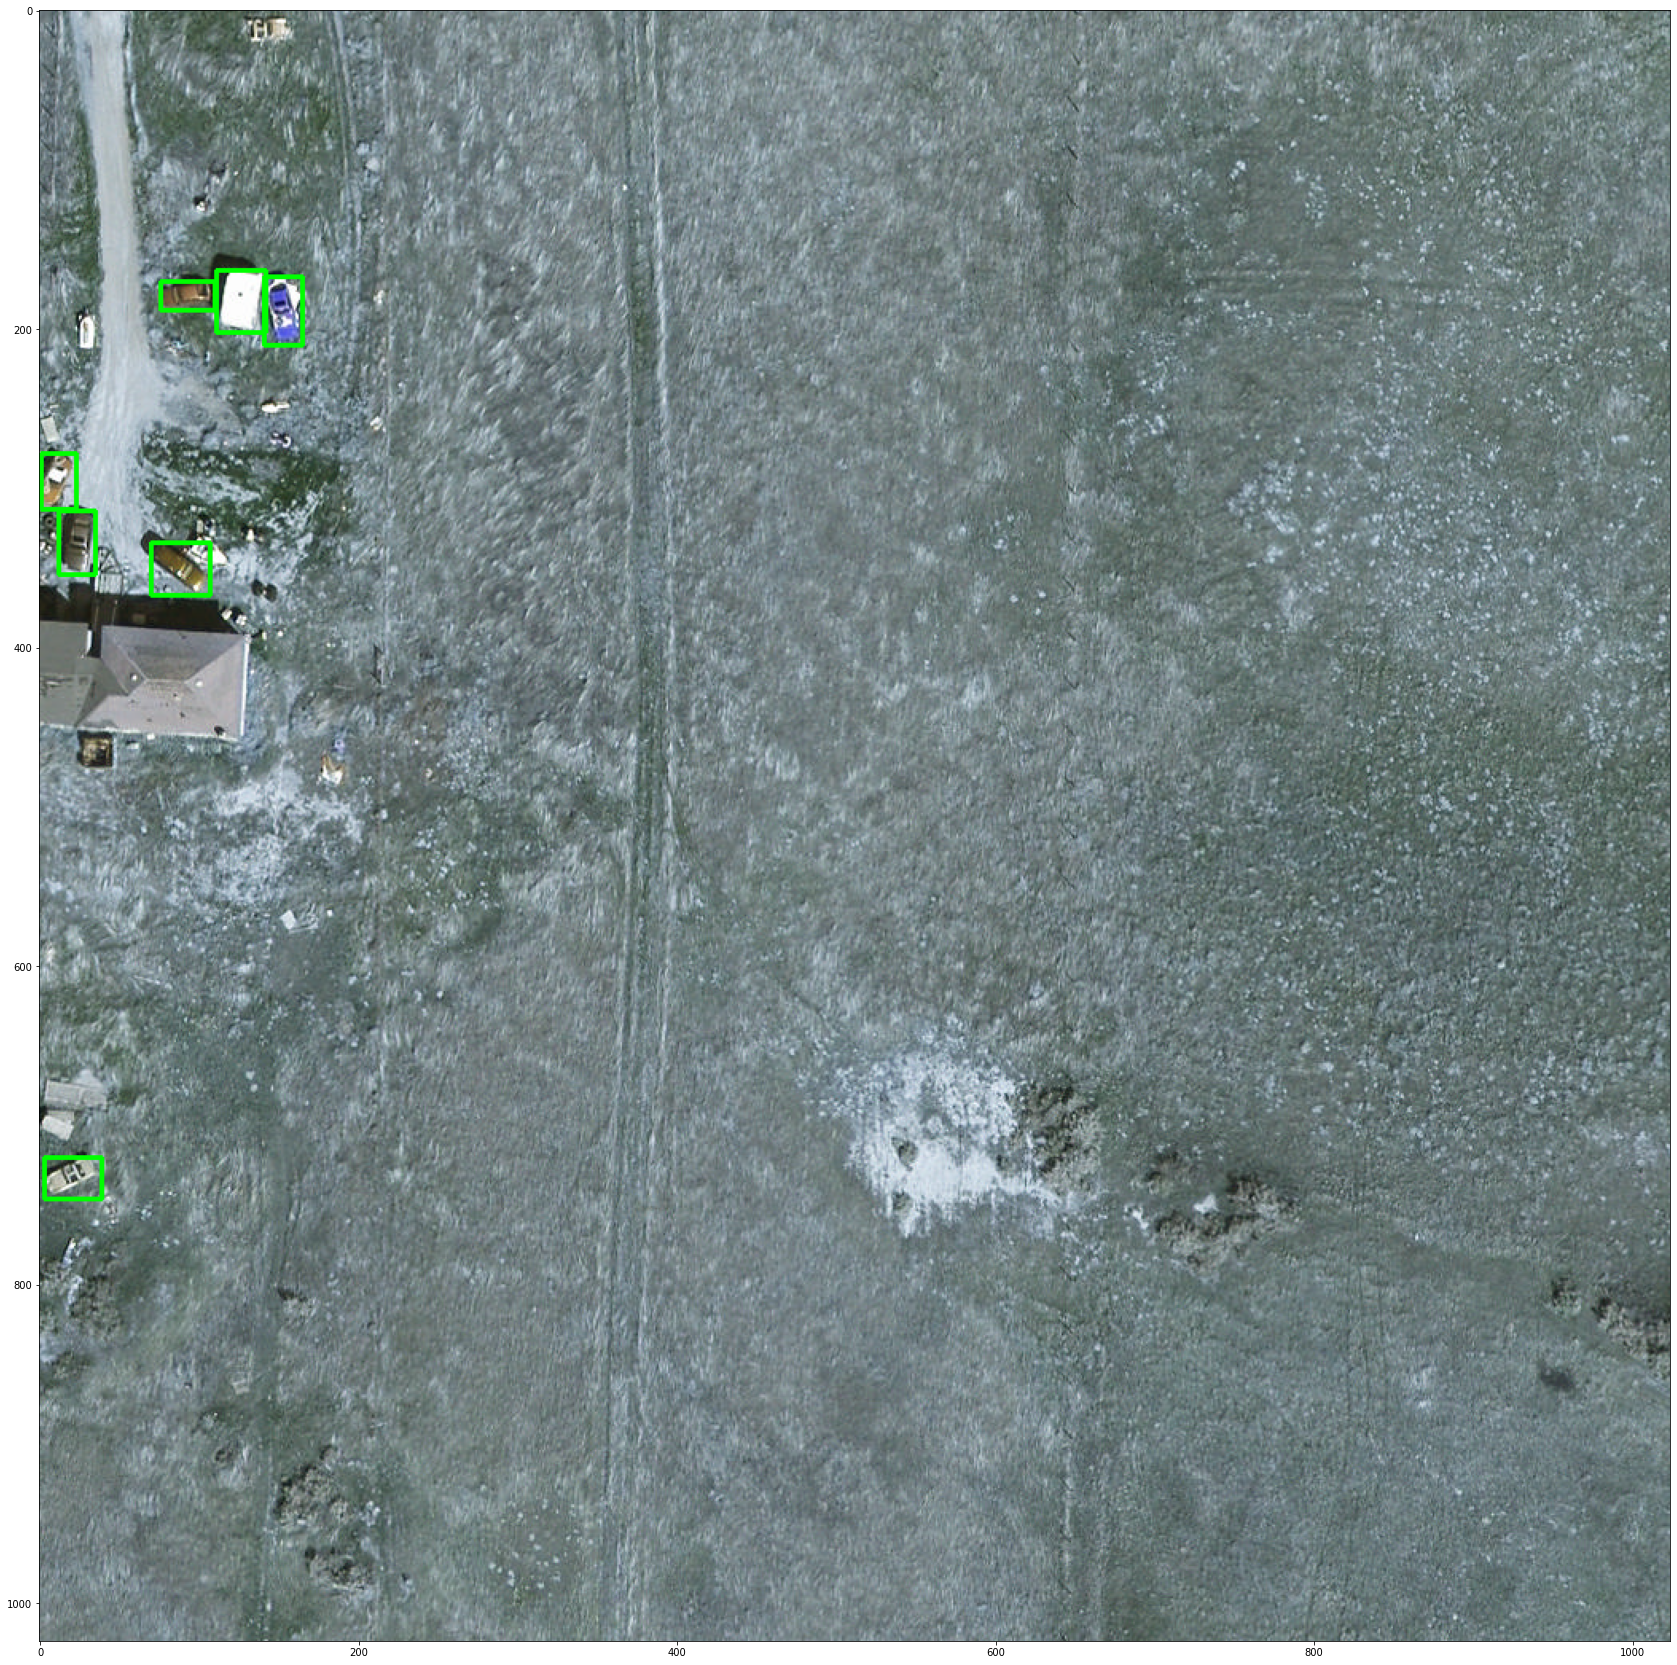

In [7]:
plt.figure(figsize=(30,30))
plt.imshow(image)